In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("Hotels_data_Changed.csv")

In [3]:
df.head()

,Unnamed: 0,Snapshot ID,Snapshot Date,Checkin Date,Days,Original Price,Discount Price,Discount Code,Available Rooms,Hotel Name,Hotel Stars,DayDiff,WeekDay,DiscountDiff,DiscountPerc
0,0,1,7/17/2015 0:00,8/12/2015 0:00,5,1178,1040,1,6,Best Western Plus Seaport Inn Downtown,3,26,Wednesday,138,88.285229
1,1,1,7/17/2015 0:00,8/19/2015 0:00,5,1113,982,1,8,Best Western Plus Seaport Inn Downtown,3,33,Wednesday,131,88.230009
2,2,1,7/17/2015 0:00,8/13/2015 0:00,5,4370,4240,1,3,The Peninsula New York,5,27,Thursday,130,97.025172
3,3,1,7/17/2015 0:00,7/26/2015 0:00,5,1739,1667,1,18,Eventi Hotel a Kimpton Hotel,4,9,Sunday,72,95.859689
4,4,1,7/17/2015 0:00,8/12/2015 0:00,5,1739,1672,1,3,Eventi Hotel a Kimpton Hotel,4,26,Wednesday,67,96.147211


In [4]:
np.mean(df['DiscountPerc'])

91.12228491116943

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


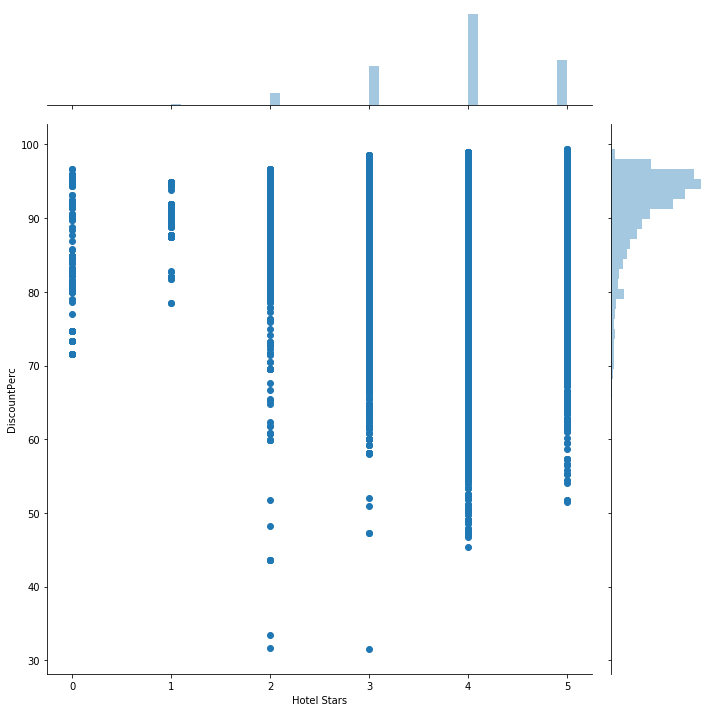

In [5]:
sns.jointplot(x='Hotel Stars',y='DiscountPerc',data = df,size=10)

In [6]:
np.min(df['DiscountPerc'])

31.574158325750684

In [7]:
Prices = df[['Discount Code', 'DiscountPerc']]
Prices.head()

,Discount Code,DiscountPerc
0,1,88.285229
1,1,88.230009
2,1,97.025172
3,1,95.859689
4,1,96.147211


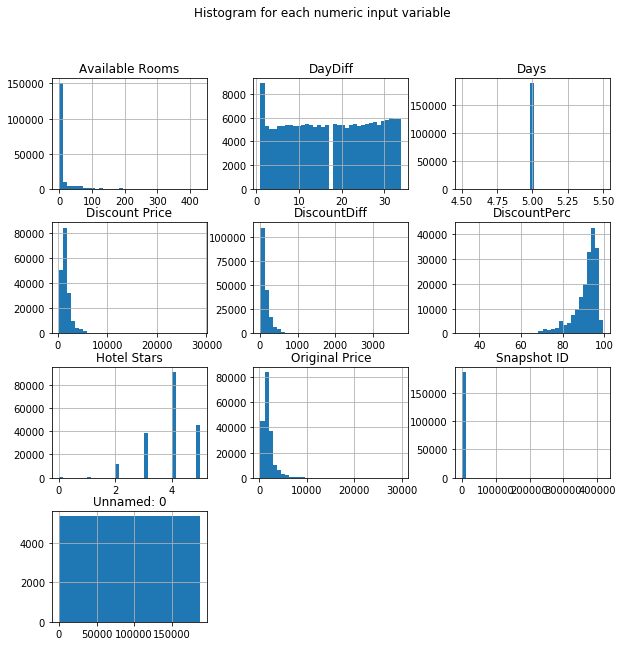

In [8]:
import pylab as pl
df.drop('Discount Code' ,axis=1).hist(bins=35, figsize=(10,10))
pl.suptitle("Histogram for each numeric input variable")
plt.savefig('Hotels_hist')
plt.show()

C:\Users\naama.zecharia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  import sys


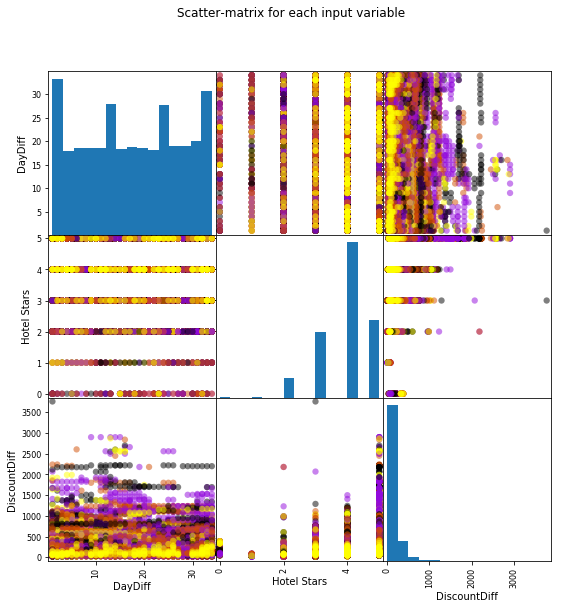

In [9]:
from pandas.tools.plotting import scatter_matrix
from matplotlib import cm
feature_names = ['DayDiff', 'Hotel Stars', 'DiscountDiff']
X = df[feature_names]
y = df['Discount Code']
cmap = cm.get_cmap('gnuplot')
scatter = pd.scatter_matrix(X, c = y, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap = cmap)
plt.suptitle('Scatter-matrix for each input variable')
plt.savefig('hotels_scatter_matrix')


In [10]:
print(df.groupby('Hotel Name').size())

Hotel Name
1 Hotel Central Park                               122
36 Hudson Hotel                                      4
6 Columbus - a SIXTY Hotel                         137
70 Park Avenue Hotel a Kimpton Hotel                43
AKA Central Park                                     8
Ace Hotel New York                                  15
Airport Hotel Inn & Suites - Newark Airport         18
Airway Inn at LaGuardia                              8
Aloft Harlem                                       210
Aloft Manhattan Downtown - Financial District       64
Aloft New York Brooklyn Hotel                       42
Americana Inn                                        1
Ameritania at Times Square                          56
Amsterdam Court Hotel                               93
AnYi Guesthouse Flushing                             2
Anchor Inn                                           2
Andaz 5th Avenue - a concept by Hyatt             1338
Andaz Wall Street - a concept by Hyatt             869

In [11]:
hotelsName = df.groupby('Hotel Name').size()
hotelsName.head(3)

Hotel Name
1 Hotel Central Park          122
36 Hudson Hotel                 4
6 Columbus - a SIXTY Hotel    137
dtype: int64

In [12]:
hotelsName.sort_values()

Hotel Name
Extended Stay America New York City - LaGuardia Airport            1
Riviera Hotel                                                      1
Union Hotel an Ascend Hotel Collection Member                      1
Best Western Plus Hospitality House                                1
Best Western Plus LaGuardia Airport Hotel Queens                   1
Fairfield Inn New York Midtown Manhattan Penn Station              1
Americana Inn                                                      1
Econo Lodge Times Square                                           1
Ramada Flushing Queens                                             1
Super Family Flat in Little Italy                                  1
Hotel Le Jolie                                                     1
Chelsea Pines Inn                                                  1
Duane Street Hotel Tribeca                                         1
Red Roof Inn Queens                                                2
The Brooklyn A Hotel   